<a href="https://colab.research.google.com/github/HI160029/Activation_Function/blob/Data-Science/Exponential_Decaying_windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exponential Decaying windows**

This algorithm also known as Exponentially Weighted Moving Average (EWMA).The equation is as follow:

$\sum_{i=0}^{t-1}a_{t-1}(1-c)^i$

where,


*   *i* indicates the index of the summation. It starts at 0 and iterates up to *t*−1. It determines which term of the summation is being calculated at any given step.
*   *t* indicates a constant representing the upper limit of the summation. It defines how many terms will be summed, and the summation runs from *i*=0 to *i*=*t*−1.
*   $a_{t-1}$ represents a constant term that depends on the value of *t*. It's subscripted by *t*−1, meaning its value may change based on the specific value of *t*.
*   *c* is decay rate.



##**Plot of the EWMA**

Following code plots the EWMA with a demo data (1, 2, 1, 2, 1), which decay raate set at 0.5. Note that the  latest data point is the one that appears at the end of the list, which in this case is 1. So, 1 is the latest data point. Meanwhile the oldest data point is the one that appears at the beginning of the list, which in this case is the first 1. So, the first 1 is the oldest data point.

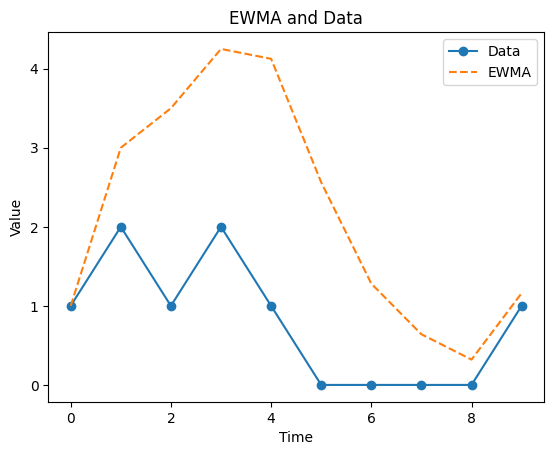

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = [1, 2, 1, 2, 1, 0, 0, 0, 0, 1]

# Decay constant
c = 0.5

# Array to store EWMA values
ewma = []

# Calculate EWMA
for t in range(len(data)):
    if t == 0:
        ewma.append(data[t])
    else:
        ewma_t = data[t]
        for i in range(t):
            ewma_t += (1 - c) ** i * data[t - i - 1]
        ewma.append(ewma_t)

# Plot
t = np.arange(len(data))
plt.plot(t, data, label='Data', marker='o')  # Plot original data
plt.plot(t, ewma, label='EWMA', linestyle='--')  # Plot EWMA
plt.title('EWMA and Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()  # Add a legend
plt.show()


Following code simply output the figure of the weight with the enfluence of the decay rate over the time.

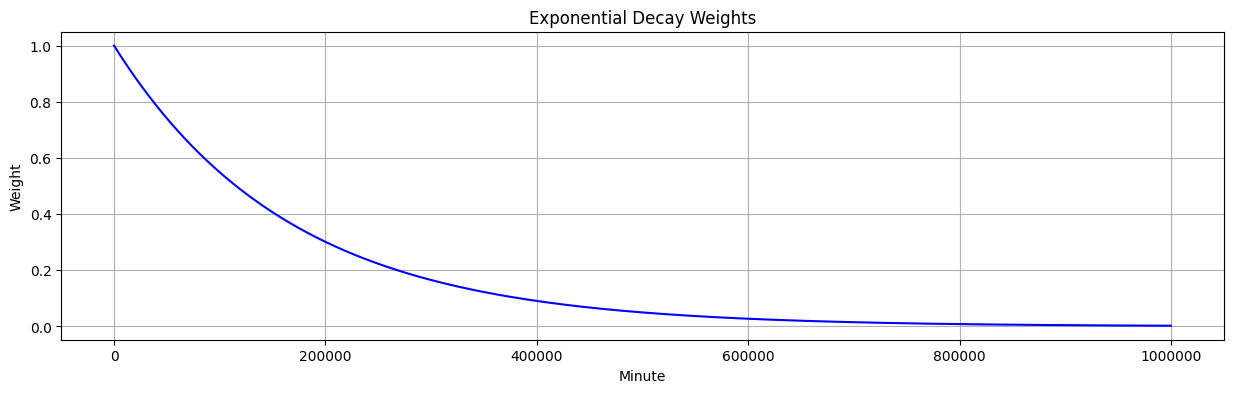

In [ ]:
import matplotlib.pyplot as plt
import math

# Hourly data
Minutes = list(range(1000000))

# Exponential decay parameters
decay_rate = 0.000006

# Calculate the weights using the exponential decay formula
weights = [math.exp(-decay_rate * t) for t in hours]

# Create the plot
plt.figure(figsize=(15, 4))
plt.plot(Minutes, weights, marker=None, linestyle='-', color='b')
plt.ticklabel_format(style='plain',axis='x',useOffset=False)
plt.xlabel('Minute')
plt.ylabel('Weight')
plt.title('Exponential Decay Weights')
plt.grid(True)

# Show the plot
plt.show()



Following code simply output the figure of the weight with the enfluence of the decay rate over the time, but with the use of Tensorflow to enable the GPU/TPU power for computation.


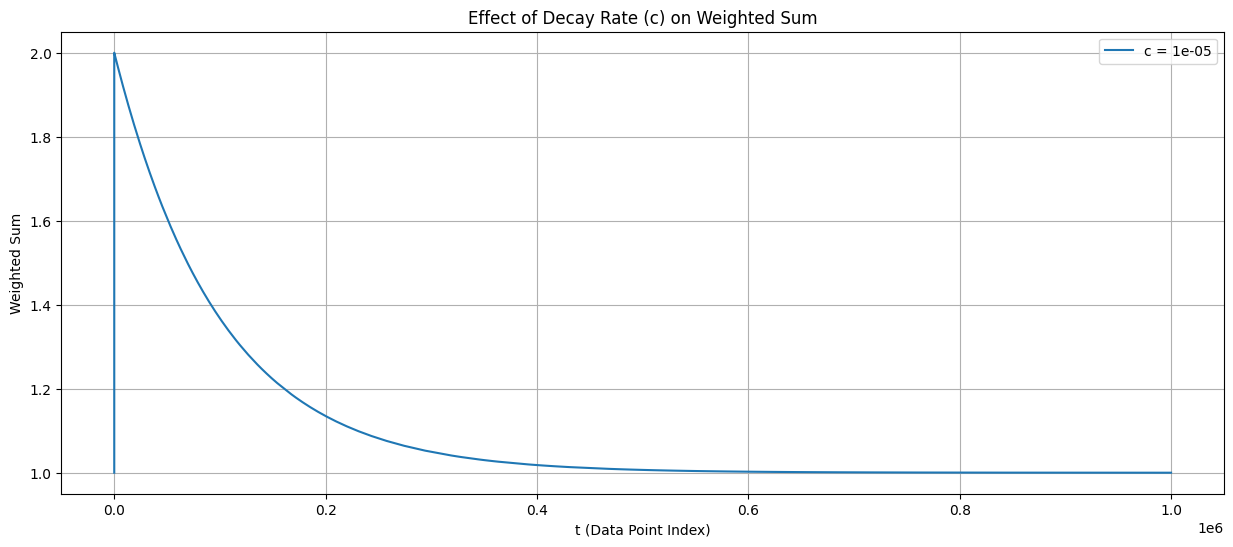

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Set up GPU device (if available)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Allow GPU memory growth to avoid memory allocation errors
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Generate stream data
t = 1000000  # Number of data points in the stream
data_points = np.arange(t)  # Data points from 0 to t-1
a_t_minus_1 = 1.0  # Constant for simplicity

# Vary the decay factor c
decay_factors = [0.00001]  # Different decay rates

# Initialize plot
plt.figure(figsize=(15, 6))
plt.title('Effect of Decay Rate (c) on Weighted Sum')
plt.xlabel('t (Data Point Index)')
plt.ylabel('Weighted Sum')

# Calculate and plot for each decay factor using TensorFlow
for c in decay_factors:
    weighted_sums = []
    prev_sum = tf.constant(0.0, dtype=tf.float32)  # Use float32 here
    for i in range(1, t+1):
        current_term = a_t_minus_1 * tf.pow(1 - c, data_points[i-1])
        current_sum = prev_sum + current_term
        weighted_sums.append(current_sum.numpy())
        prev_sum = tf.pow(prev_sum, data_points[i-1])

    plt.plot(data_points, weighted_sums, label=f'c = {c}')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Feel free to reach me at chienghh@tarc.edu.my for any correction/feedback/question/etc.